### Описание проекта

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

### Цель проекта

- Получить датасет, подготовленный для построения модели, предсказывающей результаты экзамена по математике
- Определить набор переменных для использования в модели

### Задача проекта

Провести разведывательный анализ данных (EDA) на предоставленном датасете, подготовить его для построения модели.
Для этого проанализировать численные и номинативные переменные, входящие в датасет, по необходимости очистить и преобразовать данные.
На основании анализа сделать выводы о переменных, которые должны быть использованы в построении модели.

### Выполнение

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import random

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [248]:
stmath = pd.read_csv('stud_math.csv')

In [249]:
stmath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [250]:
stmath.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Есть предположение,что столбец [studytime, granular] является производным от столбца [studytime] с коэффициентом -3.
Проверим это предположение, посчитав корреляцию обеих переменных

In [251]:
stmath1 = stmath[['studytime','studytime, granular']]
stmath1.corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


In [252]:
# Предположение подтвердилось, т.к. переменные полностью коррелированы. Удалим [studytime, granular], который не является 
# независимой переменной и, следовательно, не несет полезной информации
stmath.drop(['studytime, granular'], inplace = True, axis = 1)

Хотя info говорит о том, что в датасете 13 численных переменных, по факту их лишь три - age, absences и score, который необходимо предсказывать.
Остальные численные переменные представляют собой id номинативных и должны рассматриваться как номинативные.

Начнем с численных переменных

#### 1. age

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

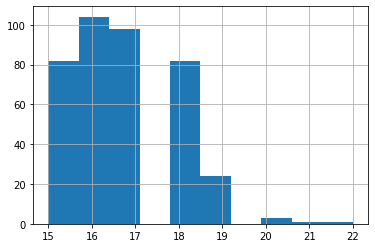

In [253]:
stmath.age.hist()
stmath.age.describe()

In [254]:
stmath.loc[stmath.age >= 20]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
306,GP,M,20,U,GT3,A,3.0,2.0,services,other,course,other,1.0,1.0,0.0,no,no,no,yes,yes,yes,no,no,5.0,5.0,3.0,5.0,0.0,90.0
376,MS,F,20,NaN,GT3,T,4.0,2.0,health,other,course,NaN,2.0,3.0,2.0,no,yes,yes,no,no,yes,yes,yes,5.0,4.0,3.0,3.0,4.0,75.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0


Исходя из распределения учеников по возрасту, ученики 20 лет и старше составляют лишь 1.3% от общего числа и могут быть исключены из датасета как выброс

In [255]:
stmath = stmath.loc[stmath.age < 20]

Данные в переменной age в результате полные и распределены нормально. 

#### 28. absences

count    378.000000
mean       6.753968
std       21.119976
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

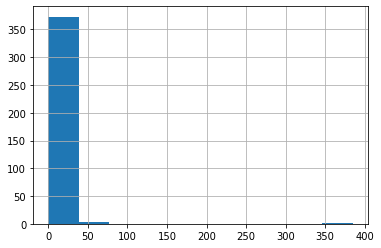

In [256]:
stmath.absences.hist()
stmath.absences.describe()

переменная absences имеет одно явно неверное значение = 385, которое заменим на 35 (предположим, что именно его собирались ввести)

In [257]:
stmath.loc[:,'absences'].replace(385.0, 35.0, inplace = True)

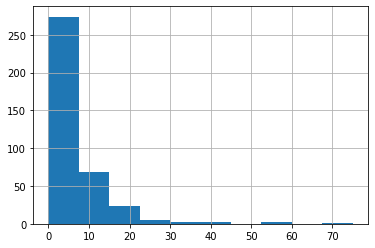

In [258]:
stmath.absences.hist()

Для переменной absences имеем гиперболическое распределение.

Кроме этого есть 12 пропущенных значений, которые, в соответствии с распределением, будет корректно заполнить нулями.

In [259]:
stmath['absences'].fillna(0, inplace = True)

#### 29. score

count    384.000000
mean      52.200521
std       22.929427
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

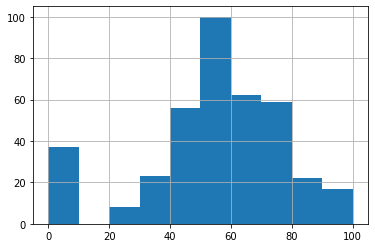

In [261]:
stmath.score.hist()
stmath.score.describe()

есть 6 пропущенных значений, которые корректно будет заполнить средним

In [262]:
mean_score = stmath.score.mean()
mean_score

52.200520833333336

In [263]:
stmath.score.fillna(mean_score, inplace = True)

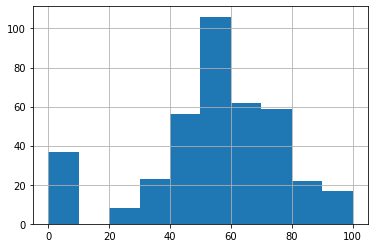

In [266]:
stmath.score.hist()

Распределение score ожидаемо нормально, за исключением нулевых значений в количестве 37. Это может быть подтверждением того, что тест не был засчитан по какой то причине, либо ученик был дисквалифицирован/не явился на тест, что никак не говорит о способности ученика его пройти.
Таким образом, логичным будет исключить записи с нулевым значением score из данных для модели.

In [267]:
stmath = stmath.loc[stmath.score > 0]

count    353.000000
mean      57.671964
std       15.987994
min       20.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

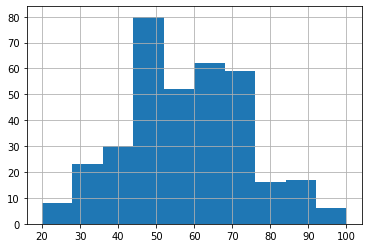

In [268]:
stmath.score.hist()
stmath.score.describe()

Посчитаем корреляцию age, absences и score, чтобы убедиться, что они независимы

In [269]:
stmath1 = stmath[['age','absences','score']]
stmath1.corr()

,age,absences,score
age,1.000000,0.197929,-0.138285
absences,0.197929,1.000000,-0.192142
score,-0.138285,-0.192142,1.000000


Подтвердили, что переменные независимы.

Перейдем к анализу остальных переменных

#### 2. school

In [270]:
pd.DataFrame(stmath.school.value_counts())

,school
GP,314
MS,39


School принимает только 2 значения, при этом данные полные и корректные.

#### 3. sex

In [271]:
pd.DataFrame(stmath.sex.value_counts())

,sex
F,185
M,168


Sex принимает только 2 значения, при этом данные полные и корректные.

### Заполнение пропущенных значений номинативных переменных

В рассматриваемых далее переменных пропущены значения, которые нужно заполнить для модели. Из многих вариантов заполнения наиболее подходящим будем заполнять пропуски с учетом веса каждого значения в данном поле. 

Для удобства сделаем функцию, которая будет принимать на вход название столбца, "вытаскивать" его значения, считать их веса исходя из частоты и возвращать взвешенный список случайных величин нужной длины для заполнения пропусков.

In [340]:
def weighted_random_fill(column):
    values_list = list(column[column.notnull()].unique())   # list of unique not null values in column
    weights_list = []
    values_count = len(column[pd.isnull(column)])      # how many NaN values to fill in column
    
    for val in values_list:
        weights_list.append(round(column[column == val].count()/column[column.notnull()].count()*100))  # calculating weights for each value
        
    return random.choices(values_list, weights=weights_list, k=values_count) # generate and return list of random weighted values

#### 4. address

In [272]:
pd.DataFrame(stmath.address.value_counts())

,address
U,266
R,72


In [273]:
stmath.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  338 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


Итого у нас 2 уникальных значения и 15 строк, в которых значение категории адреса NaN. Заполним пропуски взвешенными значениями с помощью предварительно созданной функции weighted_random_fill.

In [345]:
stmath.loc[stmath.address.isnull(), 'address'] = weighted_random_fill(stmath.address)

#### 5. famsize

In [348]:
pd.DataFrame(stmath.famsize.value_counts())

,famsize
GT3,230
LE3,99


In [349]:
stmath.loc[:, ['famsize']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  329 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


Тоже 2 уникальных значения и 24 строки, в которых значение NaN. Заполняем с помощью той же функции

In [350]:
stmath.loc[stmath.famsize.isnull(), 'famsize'] = weighted_random_fill(stmath.famsize)

#### 6. Pstatus

In [353]:
pd.DataFrame(stmath.Pstatus.value_counts())

,Pstatus
T,280
A,32


In [354]:
stmath.loc[:, ['Pstatus']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  312 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


2 уникальных значения и 41 строка, в которых значение NaN.

In [355]:
stmath.loc[stmath.Pstatus.isnull(), 'Pstatus'] = weighted_random_fill(stmath.Pstatus)

#### 7. Medu

In [63]:
pd.DataFrame(stmath.Medu.value_counts())

,Medu
4.0,130
2.0,101
3.0,95
1.0,58
0.0,3


In [65]:
stmath.loc[:, ['Medu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    387 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


5 уникальных значений и только 3 строки с NaN.

In [357]:
stmath.loc[stmath.Medu.isnull(), 'Medu'] = weighted_random_fill(stmath.Medu)

#### 8. Fedu

In [359]:
pd.DataFrame(stmath.Fedu.value_counts())

,Fedu
2.0,92
3.0,91
4.0,80
1.0,66
0.0,2
40.0,1


In [360]:
stmath.loc[:, ['Fedu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    332 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


5 уникальных значений и 21 строка с NaN.

Мы знаем, что Fedu - категорийная переменная, которая может принимать значения от 0 до 4. Имеем некорректное значение 
Fedu = 40, которое заменяем на 4

In [363]:
stmath.loc[:,'Fedu'].replace(40.0, 4.0, inplace = True)

In [365]:
stmath.loc[stmath.Fedu.isnull(), 'Fedu'] = weighted_random_fill(stmath.Fedu)

#### 9. Mjob

In [368]:
pd.DataFrame(stmath.Mjob.value_counts())

,Mjob
other,120
services,87
teacher,51
at_home,49
health,29


In [369]:
stmath.loc[:, ['Mjob']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    336 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


5 уникальных значений и 17 строк с NaN.

In [370]:
stmath.loc[stmath.Mjob.isnull(), 'Mjob'] = weighted_random_fill(stmath.Mjob)

#### 10. Fjob

In [372]:
pd.DataFrame(stmath.Fjob.value_counts())

,Fjob
other,176
services,90
teacher,26
health,15
at_home,14


In [373]:
stmath.loc[:, ['Fjob']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    321 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


5 уникальных значений и 32 NaN.

In [374]:
stmath.loc[stmath.Fjob.isnull(), 'Fjob'] = weighted_random_fill(stmath.Fjob)

#### 11. reason

In [376]:
pd.DataFrame(stmath.reason.value_counts())

,reason
course,117
reputation,97
home,92
other,32


In [377]:
stmath.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  338 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


4 уникальных значения и 15 NaN.

In [378]:
stmath.loc[stmath.reason.isnull(), 'reason'] = weighted_random_fill(stmath.reason)

#### 12. guardian

In [380]:
pd.DataFrame(stmath.guardian.value_counts())

,guardian
mother,226
father,78
other,23


In [381]:
stmath.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  327 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


3 уникальных значения и 26 NaN.

In [382]:
stmath.loc[stmath.guardian.isnull(), 'guardian'] = weighted_random_fill(stmath.guardian)

#### 13. traveltime

In [383]:
pd.DataFrame(stmath.traveltime.value_counts())

,traveltime
1.0,218
2.0,87
3.0,18
4.0,7


In [384]:
stmath.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  330 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


4 уникальных значения и 23 NaN.

In [385]:
stmath.loc[stmath.traveltime.isnull(), 'traveltime'] = weighted_random_fill(stmath.traveltime)

#### 14. studytime

In [386]:
pd.DataFrame(stmath.studytime.value_counts())

,studytime
2.0,177
1.0,87
3.0,58
4.0,24


In [387]:
stmath.loc[:, ['studytime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  346 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


4 уникальных значения и 7 NaN.

In [388]:
stmath.loc[stmath.studytime.isnull(), 'studytime'] = weighted_random_fill(stmath.studytime)

#### 15. failures

In [390]:
pd.DataFrame(stmath.failures.value_counts())

,failures
0.0,275
1.0,39
2.0,10
3.0,9


In [391]:
stmath.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  333 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


4 уникальных значения и 20 NaN.

In [392]:
stmath.loc[stmath.failures.isnull(), 'failures'] = weighted_random_fill(stmath.failures)

#### 16. schoolsup

In [394]:
pd.DataFrame(stmath.schoolsup.value_counts())

,schoolsup
no,295
yes,50


In [395]:
stmath.loc[:, ['schoolsup']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  345 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


2 уникальных значения и 8 NaN.

In [396]:
stmath.loc[stmath.schoolsup.isnull(), 'schoolsup'] = weighted_random_fill(stmath.schoolsup)

#### 17. famsup

In [397]:
pd.DataFrame(stmath.famsup.value_counts())

,famsup
yes,197
no,119


In [398]:
stmath.loc[:, ['famsup']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  316 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


2 уникальных значения и 37 NaN.

In [399]:
stmath.loc[stmath.famsup.isnull(), 'famsup'] = weighted_random_fill(stmath.famsup)

#### 18. paid

In [401]:
pd.DataFrame(stmath.paid.value_counts())

,paid
no,170
yes,146


In [402]:
stmath.loc[:, ['paid']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    316 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


2 уникальных значения и 37 NaN.

In [403]:
stmath.loc[stmath.paid.isnull(), 'paid'] = weighted_random_fill(stmath.paid)

#### 19. activities

In [405]:
pd.DataFrame(stmath.activities.value_counts())

,activities
yes,174
no,167


In [406]:
stmath.loc[:, ['activities']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  341 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


2 уникальных значения и 12 NaN.

In [407]:
stmath.loc[stmath.activities.isnull(), 'activities'] = weighted_random_fill(stmath.activities)

#### 20. nursery

In [408]:
pd.DataFrame(stmath.nursery.value_counts())

,nursery
yes,273
no,67


In [409]:
stmath.loc[:, ['nursery']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  340 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


2 уникальных значения и 13 NaN.

In [410]:
stmath.loc[stmath.nursery.isnull(), 'nursery'] = weighted_random_fill(stmath.nursery)

#### 21. higher	

In [411]:
pd.DataFrame(stmath.higher.value_counts())

,higher
yes,323
no,12


In [412]:
stmath.loc[:, ['higher']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  335 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


2 уникальных значения и 18 NaN.

In [413]:
stmath.loc[stmath.higher.isnull(), 'higher'] = weighted_random_fill(stmath.higher)

#### 22. internet	

In [415]:
pd.DataFrame(stmath.internet.value_counts())

,internet
yes,277
no,47


In [416]:
stmath.loc[:, ['internet']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  324 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


2 уникальных значения и 29 NaN.

In [417]:
stmath.loc[stmath.internet.isnull(), 'internet'] = weighted_random_fill(stmath.internet)

#### 23. romantic	

In [419]:
pd.DataFrame(stmath.romantic.value_counts())

,romantic
no,221
yes,103


In [420]:
stmath.loc[:, ['romantic']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  324 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


2 уникальных значения и 29 NaN.

In [421]:
stmath.loc[stmath.romantic.isnull(), 'romantic'] = weighted_random_fill(stmath.romantic)

#### 24. famrel	

In [426]:
pd.DataFrame(stmath.famrel.value_counts())

,famrel
4.0,167
5.0,85
3.0,56
2.0,14
1.0,7


In [427]:
stmath.loc[:, ['famrel']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  329 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


5 уникальных значений и 24 NaN.

famrel - номинативная переменная, которая может принимать значения от 1 до 5. Имеем некорректное значение = -1, которое заменяем на 1

In [424]:
stmath.loc[:,'famrel'].replace(-1.0, 1.0, inplace = True)

In [428]:
stmath.loc[stmath.famrel.isnull(), 'famrel'] = weighted_random_fill(stmath.famrel)

#### 25. freetime	

In [430]:
pd.DataFrame(stmath.freetime.value_counts())

,freetime
3.0,133
4.0,102
2.0,59
5.0,33
1.0,16


In [431]:
stmath.loc[:, ['freetime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  343 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


5 уникальных значений и 10 NaN.

In [432]:
stmath.loc[stmath.freetime.isnull(), 'freetime'] = weighted_random_fill(stmath.freetime)

#### 26. goout	

In [433]:
pd.DataFrame(stmath.goout.value_counts())

,goout
3.0,116
2.0,92
4.0,76
5.0,43
1.0,19


In [434]:
stmath.loc[:, ['goout']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   346 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


5 уникальных значений и 7 NaN.

In [435]:
stmath.loc[stmath.goout.isnull(), 'goout'] = weighted_random_fill(stmath.goout)

#### 27. health	

In [436]:
pd.DataFrame(stmath.health.value_counts())

,health
5.0,124
3.0,80
4.0,55
1.0,44
2.0,37


In [437]:
stmath.loc[:, ['health']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  340 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


5 уникальных значений и 13 NaN.

In [438]:
stmath.loc[stmath.health.isnull(), 'health'] = weighted_random_fill(stmath.health)

### Анализ номинативных переменных

После того, как мы заполнили все пропущенные значения, проведем анализ номинативных переменных, чтобы определить, какие из них войдут в итоговый датасет для модели.

Сначала проанализируем визуально, с помощью boxplot.

In [450]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y=stmath.score, 
                data=stmath.loc[:, [column]],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

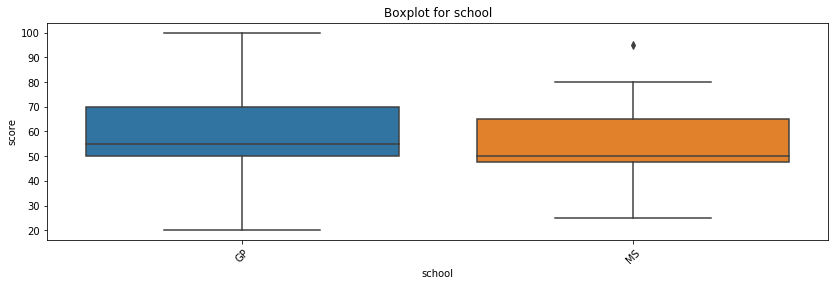

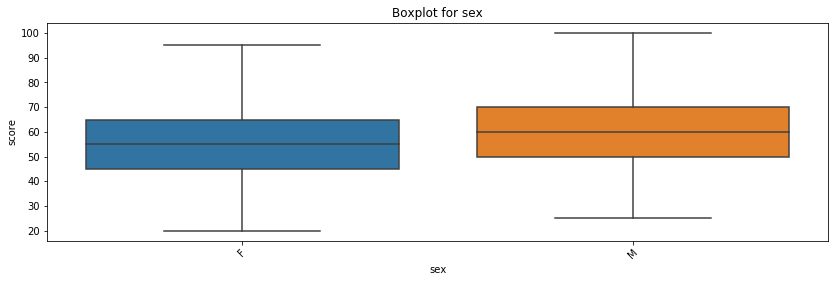

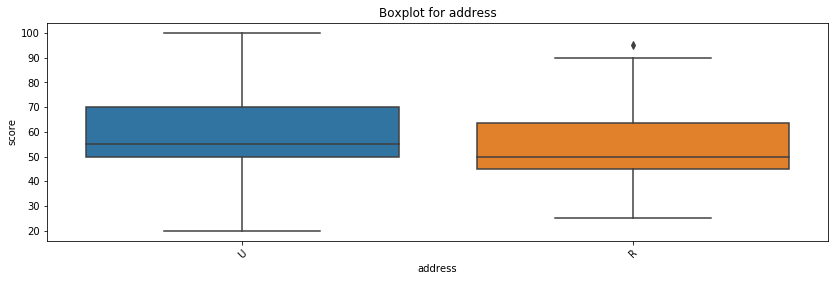

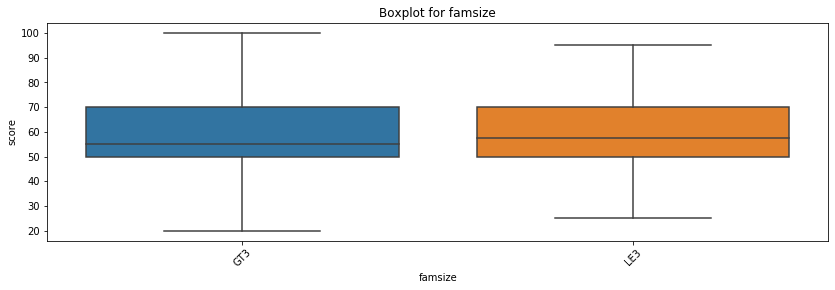

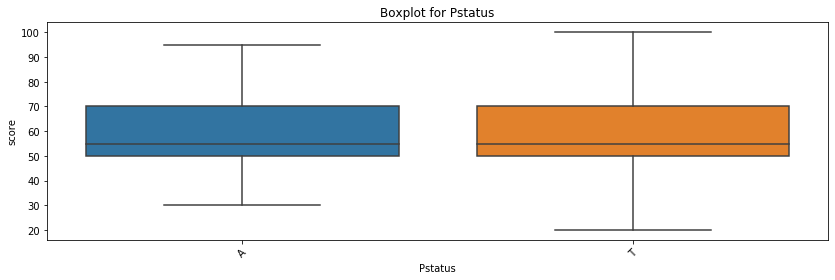

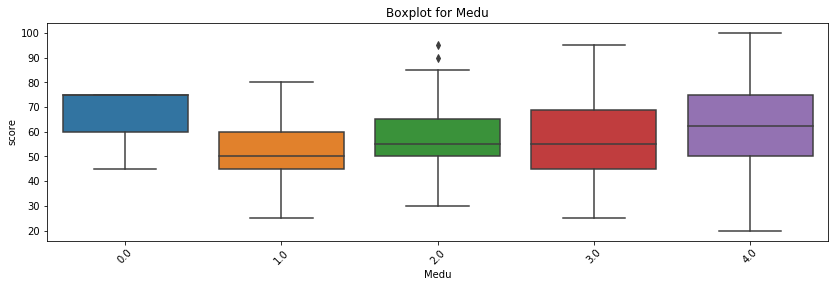

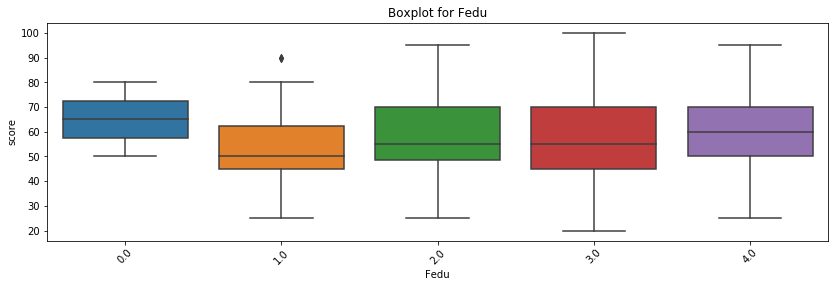

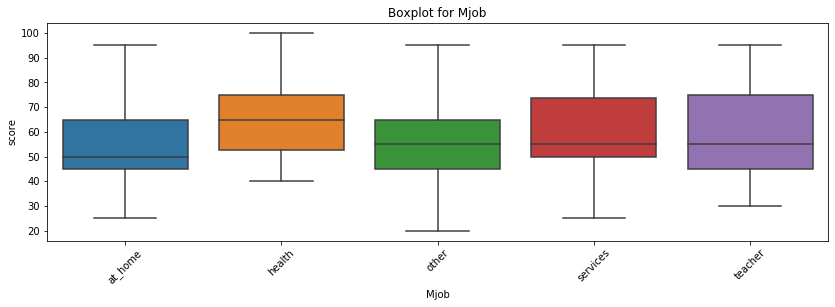

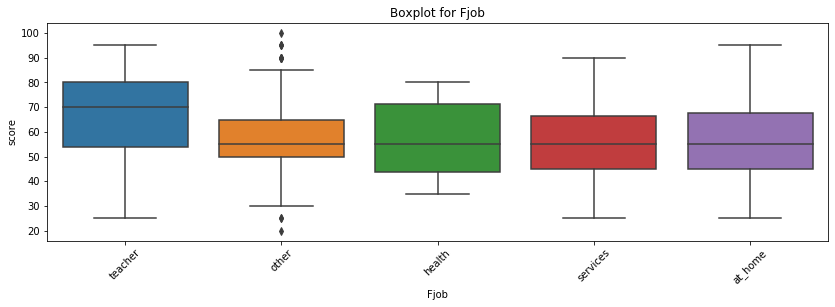

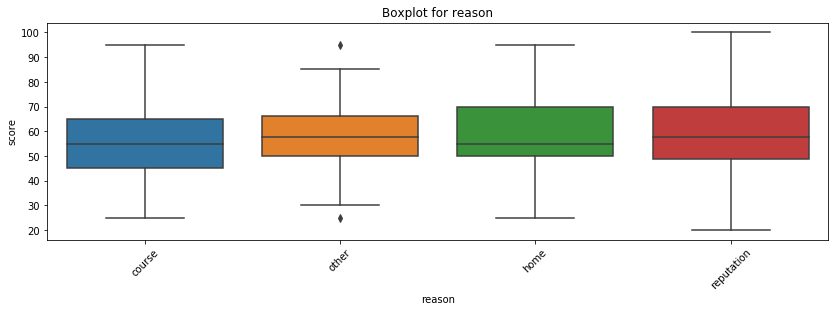

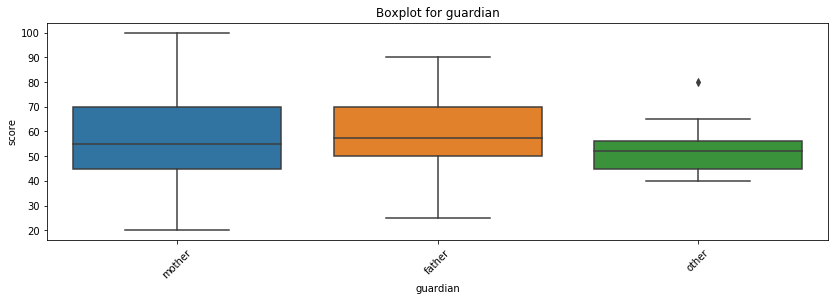

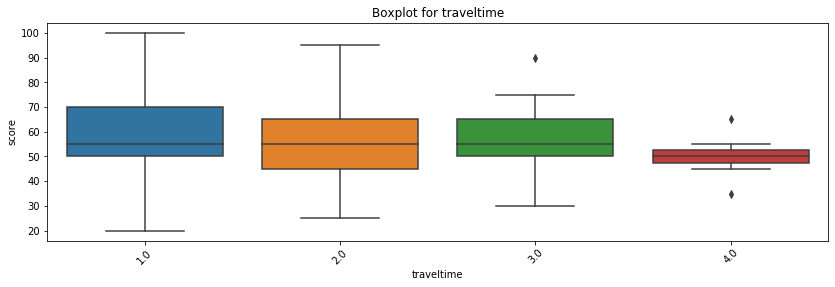

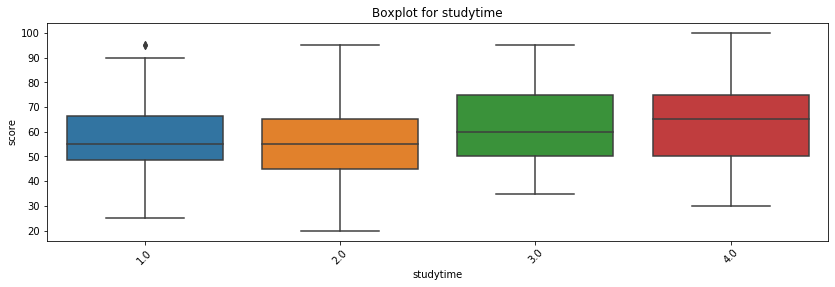

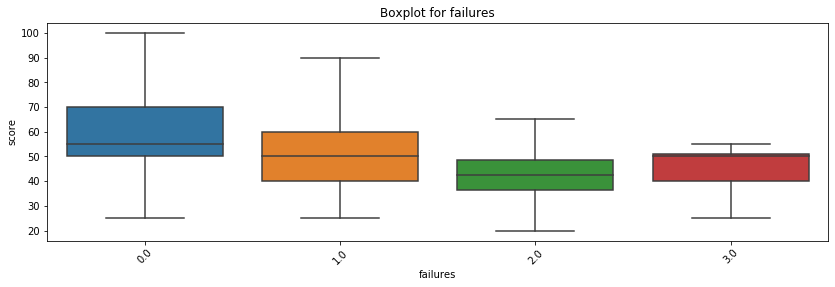

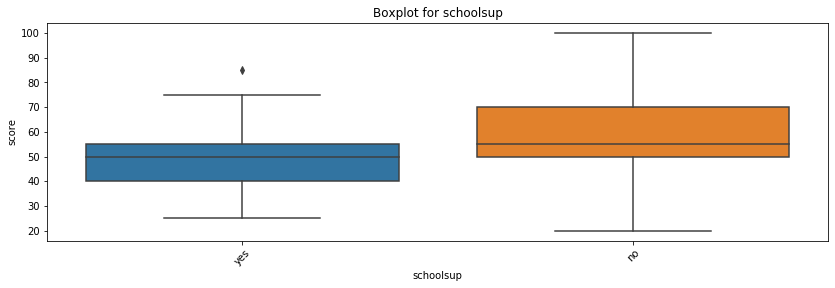

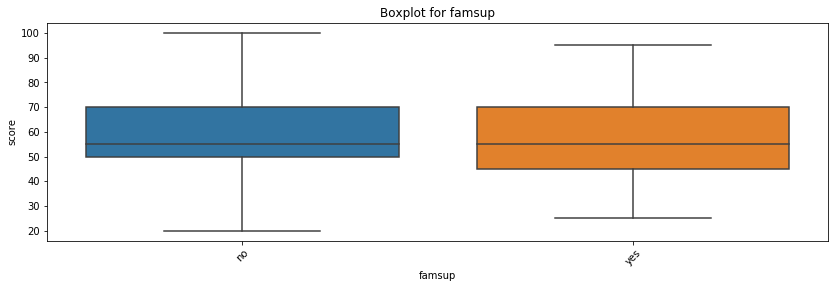

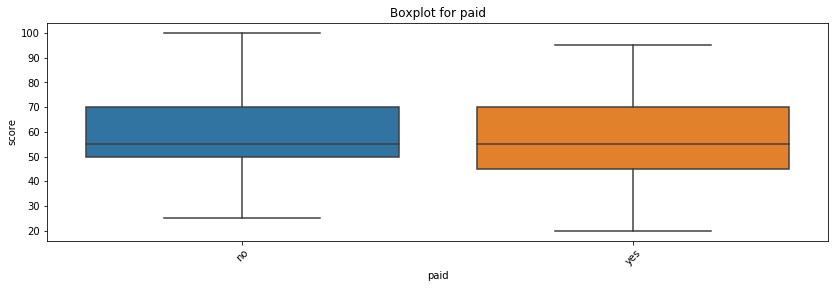

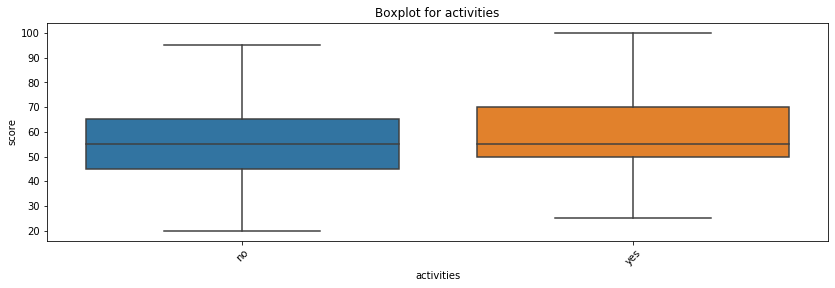

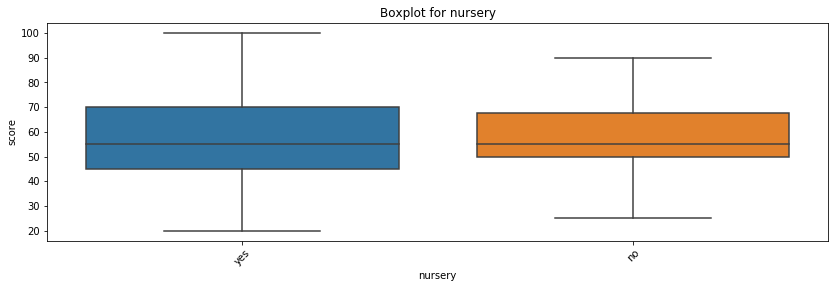

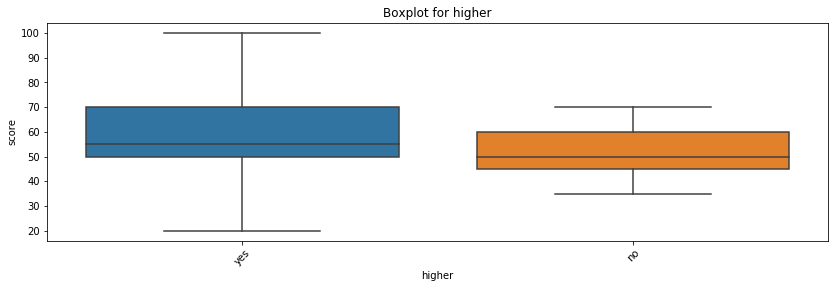

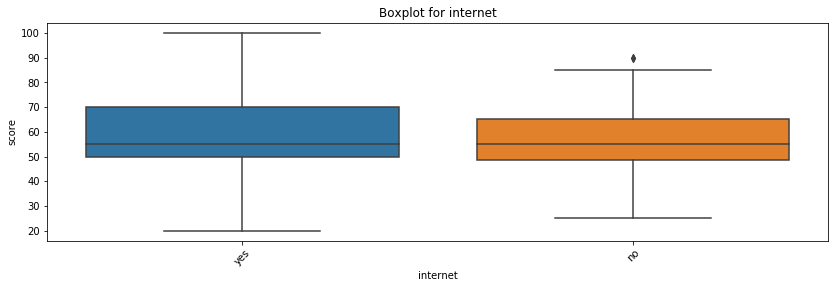

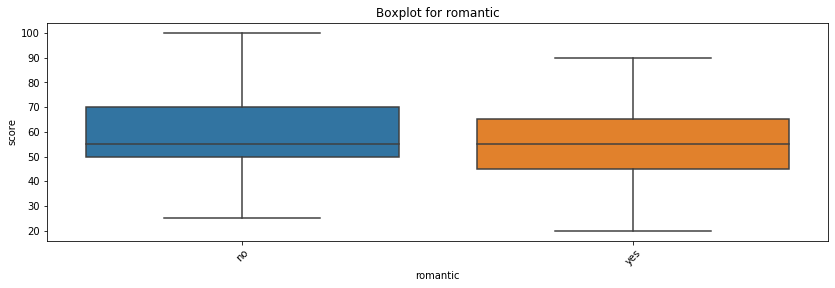

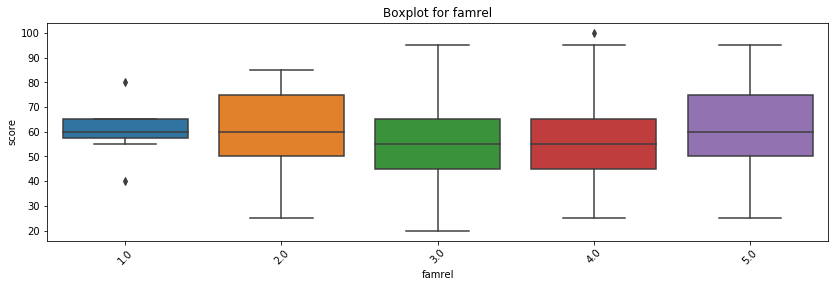

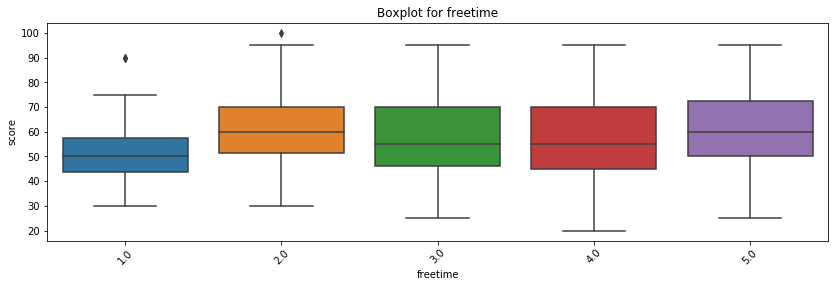

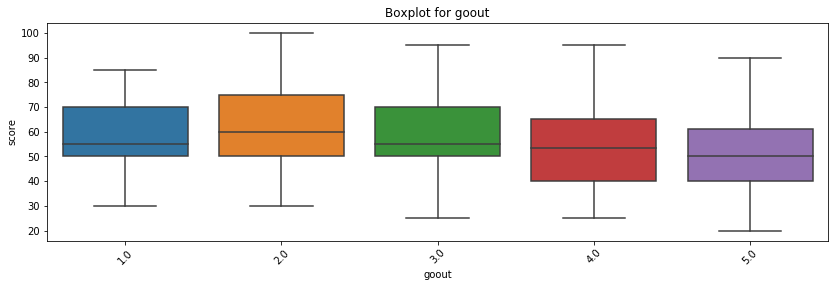

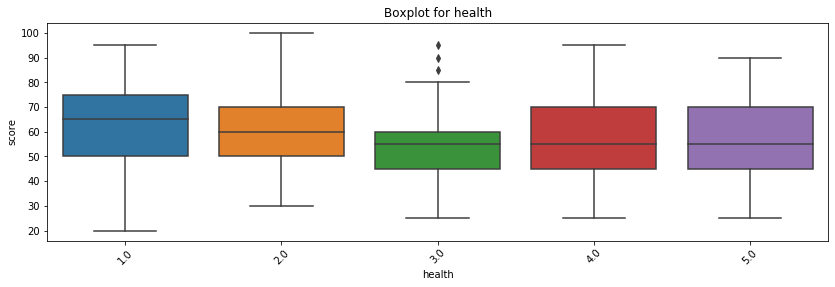

In [452]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', \
            'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', \
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме famsize, Pstatus, paid  могут влиять на оценку ученика. Однако графики являются лишь вспомогательным инструментом. 

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок учеников по различным параметрам неразличимы:

In [490]:
def get_stat_dif(column):
    cols = stmath.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stmath.loc[stmath.loc[:, column] == comb[0], 'score'], 
                        stmath.loc[stmath.loc[:, column] == comb[1], 'score']).pvalue <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [491]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', \
            'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', \
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


Тест Стьюдента выявил статистически значимые различия в 9 параметрах: sex,  address, Medu, Fedu, Mjob, studytime, failures, schoolsup, goout. Оставим эти переменные в датасете для дальнейшего построения модели. 

Итак, в нашем случае переменные, которые возможно оказывают влияние на оценку (score), это: age, absences, sex,  address, Medu, Fedu, Mjob, studytime, failures, schoolsup, goout.

In [492]:
stmath_for_model = stmath.loc[:, ['age', 'absences', 'sex', 'address', 'Medu', 'Fedu', 'Mjob', 'studytime', 'failures', 'schoolsup', 'goout']]
stmath_for_model.head()

,age,absences,sex,address,Medu,Fedu,Mjob,studytime,failures,schoolsup,goout
0,18,6.0,F,U,4.0,4.0,at_home,2.0,0.0,yes,4.0
1,17,4.0,F,U,1.0,1.0,at_home,2.0,0.0,no,3.0
2,15,10.0,F,U,1.0,1.0,at_home,2.0,3.0,yes,2.0
3,15,2.0,F,U,4.0,2.0,health,3.0,0.0,no,2.0
4,16,4.0,F,U,3.0,3.0,other,2.0,0.0,no,2.0


### Выводы

Итак, в результате EDA для оценки влияния статистических данных об условиях жизни учащихся на их оценку по математике, были получены следующие выводы:

- В большинстве номинативных параметров встречались пустые значения, в некоторых из них пропуски составили 10% от общего количества записей и более. Пропущенные значения во всех номинативных параметрах были заполнены взвешенными случайными величинами, где вес определялся частотой каждого значения.
- Численные параметры absences и score также содержали пропуски. Были построены распределения этих параметров, которые помогли определить способ заполнения пропущенных значений.
- Пять записей для учеников возраста 20 лет и более были удалены, т.к. составляли чуть более 1% от общего количества записей. Это позволило привести распределение age к нормальному. 
- Параметр absences содержал выброс, который являлся ошибкой в данных. Это значение было изменено на адекватное.
- Параметр score содержал 6 пропущенных и 37 (~10%) нулевых значений, которые возможно свидетельствовали о дисквалификации / неявке ученика / отсутствии оценки. Эти записи не позволяли оценить влияние параметров на успеваемость, поэтому тоже были удалены из датасета. Пропущенные значения были заменены средним значением score, т.к. этот параметр распределен нормально.
- Параметры famrel и Fedu каждый содержали по одному некорректному значению, которые были исправлены.
- Параметр [studytime, granular] был исключен из датасета, т.к. не являлся независимым. 
- Все вышесказанное позволяет охарактеризовать данные как относительно чистые. 
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это: age, absences, sex, address, Medu, Fedu, Mjob, studytime, failures, schoolsup, goout.